# Data Preparation

In [168]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.optimize import minimize
import seaborn as sns

In [169]:
# Step 1: Load the Data
dataset1 = pd.read_csv('/content/preprocessed_data 1.csv')
dataset1.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Ticker,Beta,P/E Ratio,...,PC1,PC2,PC3,Month,DayOfWeek,Daily_Return,MA20,MA50,Log_PE_Ratio,Log_PEG_Ratio
0,2020-01-02,-0.527490,-0.528801,-0.526355,-0.527421,-0.529219,-0.177086,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1,3,-0.000131,NaN,NaN,0.710776,-0.2276
1,2020-01-03,-0.527319,-0.528716,-0.526527,-0.527676,-0.529440,-0.103929,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1,4,0.000677,NaN,NaN,0.710776,-0.2276
2,2020-01-06,-0.527745,-0.529055,-0.526527,-0.527847,-0.529587,-0.133960,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1,0,0.000192,NaN,NaN,0.710776,-0.2276
3,2020-01-07,-0.527831,-0.529139,-0.526871,-0.527761,-0.529513,0.027768,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1,1,-0.000131,NaN,NaN,0.710776,-0.2276
4,2020-01-08,-0.528257,-0.528885,-0.526871,-0.527506,-0.529293,0.073270,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1,2,-0.001421,NaN,NaN,0.710776,-0.2276


In [170]:
dataset1.columns

Index(['Date_x', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker', 'Beta', 'P/E Ratio', 'Market Cap', '52 Week High',
       '52 Week Low', '50 Day Moving Average', '200 Day Moving Average',
       'Forward P/E Ratio', 'PEG Ratio', 'Dividend Yield', 'Dividend Rate',
       'Payout Ratio', 'Revenue Growth', 'Profit Margin', 'Year', 'PC1', 'PC2',
       'PC3', 'Month', 'DayOfWeek', 'Daily_Return', 'MA20', 'MA50',
       'Log_PE_Ratio', 'Log_PEG_Ratio'],
      dtype='object')

In [171]:
dataset1.isna().sum()

,0
Date_x,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Ticker,0
Beta,0
P/E Ratio,0


In [172]:
# AGGREGATION

# Assuming df is your DataFrame
aggregated_dataset1 = dataset1.groupby('Ticker').agg({
    'Daily_Return': 'mean',
    'Volume': 'mean',
    'Adj Close': 'mean',
    'Market Cap': 'mean',
    'Beta': 'mean',
    'P/E Ratio': 'mean',
    'PC1': 'mean',
    'PC2': 'mean',
    'PC3': 'mean'
}).reset_index()

aggregated_dataset1


,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3
0,9CI.SI,0.000058,-0.208416,-0.527212,1.582730e+10,-0.194696,2.263523,0.598509,0.588040,0.065306
1,A17U.SI,0.000036,-0.148855,-0.532121,1.275124e+10,-0.380206,1.995714,-0.007453,-0.007557,-0.001224
2,AAPL,0.006361,0.967379,0.723892,3.439320e+12,1.210488,0.145350,-0.007237,-0.006056,0.001234
3,AJBU.SI,0.000035,-0.243631,-0.536903,3.778429e+09,-0.216019,-0.156676,-0.007453,-0.007557,-0.001224
4,AMD,0.014817,0.601414,0.322331,2.585522e+11,2.176419,3.000000,-0.007237,-0.006056,0.001234
5,AMZN,0.000661,0.668811,0.690379,1.943050e+12,1.010052,0.437150,-0.007237,-0.006056,0.001234
6,ARKK,0.003148,-0.133826,0.030471,1.000000e-05,-1.433540,-0.880751,-0.007237,-0.006056,0.001234
7,AW9U.SI,0.000033,-0.295607,-0.551976,5.847464e+08,-0.363148,-0.603024,-0.007453,-0.007557,-0.001224
8,BABA,0.008135,-0.036313,0.666374,2.710991e+11,-0.734168,-0.037849,-0.007237,-0.006056,0.001234
9,BN4.SI,0.000036,-0.251733,-0.518566,1.195632e+10,0.016401,-0.400292,-0.007453,-0.007557,-0.001224


In [173]:
# Z score normalisation

# Selecting columns to normalize (excluding 'Ticker')
columns_to_normalize = aggregated_dataset1.columns.difference(['Ticker'])

# Initializing the scaler
scaler = StandardScaler()

# Standardizing the selected columns
aggregated_dataset1[columns_to_normalize] = scaler.fit_transform(aggregated_dataset1[columns_to_normalize])

# Display the standardized dataset
aggregated_dataset1

,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3
0,9CI.SI,0.108949,-0.295183,-0.588197,-0.353376,-0.187510,2.512047,7.128608,7.134230,6.895156
1,A17U.SI,0.107176,-0.187630,-0.593331,-0.357173,-0.371350,2.213294,-0.149207,-0.152425,-0.191319
2,AAPL,0.615222,1.828062,0.720118,3.872884,1.205027,0.149128,-0.146620,-0.134057,0.070430
3,AJBU.SI,0.107109,-0.358775,-0.598331,-0.368250,-0.208641,-0.187796,-0.149207,-0.152425,-0.191319
4,AMD,1.294352,1.167205,0.300194,-0.053735,2.162264,3.333621,-0.146620,-0.134057,0.070430
5,AMZN,0.157416,1.288911,0.685073,2.025757,1.006395,0.474644,-0.146620,-0.134057,0.070430
6,ARKK,0.357115,-0.160490,-0.005012,-0.372915,-1.415204,-0.995536,-0.146620,-0.134057,0.070430
7,AW9U.SI,0.106983,-0.452633,-0.614094,-0.372193,-0.354446,-0.685718,-0.149207,-0.152425,-0.191319
8,BABA,0.757705,0.015599,0.659970,-0.038246,-0.722126,-0.055239,-0.146620,-0.134057,0.070430
9,BN4.SI,0.107238,-0.373406,-0.579156,-0.358155,0.021687,-0.459562,-0.149207,-0.152425,-0.191319


# KMeans Clustering

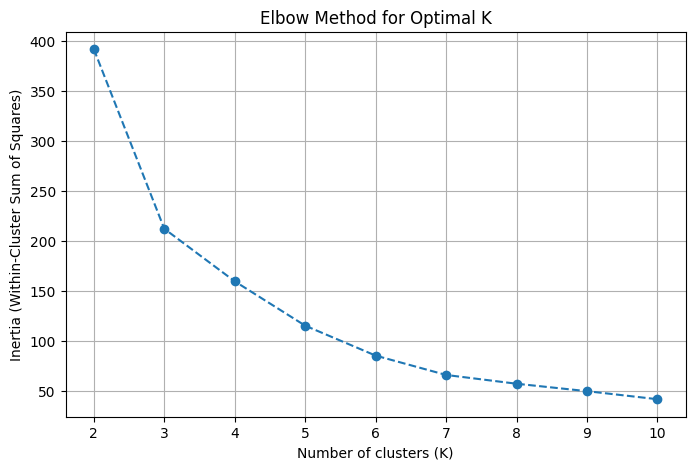

In [174]:
# Step 2: K means clustering

# Method 1: ELBOW METHOD TO FIND THE OPTIMAL K-value
# 'aggregated_dataset1' is already normalized, excluding 'Ticker'
columns_to_cluster = aggregated_dataset1.columns.difference(['Ticker'])

# List to store the inertia for each K value
inertia_values = []

# Checking for K values between 2 and 10 (you can adjust the range)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_dataset1[columns_to_cluster])
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# inertia decreases fast between 3 and 4

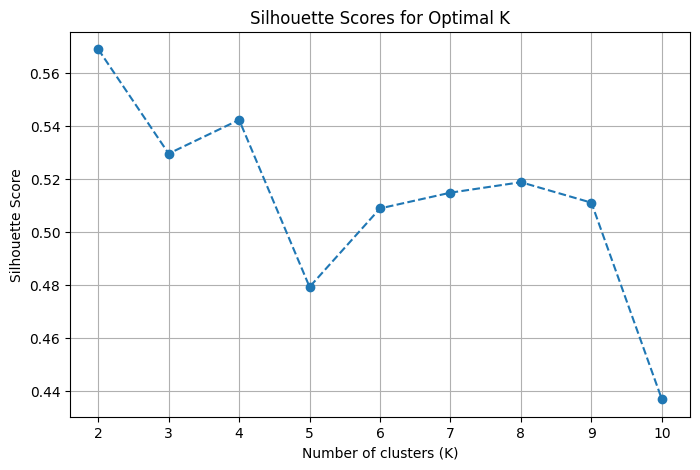

In [175]:
# Method 2: SILHOUETTE SCORE TO FIND THE OPTIMAL K
from sklearn.metrics import silhouette_score

# List to store silhouette scores for each K
silhouette_scores = []

# Checking silhouette score for K values between 2 and 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_dataset1[columns_to_cluster])
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(aggregated_dataset1[columns_to_cluster], labels))

# Plotting Silhouette Score Curve
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [176]:
def apply_kmeans(scaled_data, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    return kmeans, clusters

In [177]:
aggregated_dataset1[columns_to_cluster].head()

,Adj Close,Beta,Daily_Return,Market Cap,P/E Ratio,PC1,PC2,PC3,Volume
0,-0.588197,-0.187510,0.108949,-0.353376,2.512047,7.128608,7.134230,6.895156,-0.295183
1,-0.593331,-0.371350,0.107176,-0.357173,2.213294,-0.149207,-0.152425,-0.191319,-0.187630
2,0.720118,1.205027,0.615222,3.872884,0.149128,-0.146620,-0.134057,0.070430,1.828062
3,-0.598331,-0.208641,0.107109,-0.368250,-0.187796,-0.149207,-0.152425,-0.191319,-0.358775
4,0.300194,2.162264,1.294352,-0.053735,3.333621,-0.146620,-0.134057,0.070430,1.167205


In [178]:
k5,c5 = apply_kmeans(aggregated_dataset1[columns_to_cluster],5)
aggregated_dataset1['Cluster5'] = c5

In [179]:
k4,c4 = apply_kmeans(aggregated_dataset1[columns_to_cluster],4)
aggregated_dataset1['Cluster4'] = c4

In [180]:
k3,c3 = apply_kmeans(aggregated_dataset1[columns_to_cluster],3)
aggregated_dataset1['Cluster3'] = c3

In [181]:
aggregated_dataset1.head()

,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3,Cluster5,Cluster4,Cluster3
0,9CI.SI,0.108949,-0.295183,-0.588197,-0.353376,-0.187510,2.512047,7.128608,7.134230,6.895156,2,2,2
1,A17U.SI,0.107176,-0.187630,-0.593331,-0.357173,-0.371350,2.213294,-0.149207,-0.152425,-0.191319,0,0,0
2,AAPL,0.615222,1.828062,0.720118,3.872884,1.205027,0.149128,-0.146620,-0.134057,0.070430,1,1,1
3,AJBU.SI,0.107109,-0.358775,-0.598331,-0.368250,-0.208641,-0.187796,-0.149207,-0.152425,-0.191319,0,0,0
4,AMD,1.294352,1.167205,0.300194,-0.053735,2.162264,3.333621,-0.146620,-0.134057,0.070430,1,1,1


In [182]:
numeric_cols = aggregated_dataset1.select_dtypes(include=['number']).columns

# print(cluster_summary)
def plot_feature_boxplot(agg_data, feature, cluster_feature):

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cluster_feature, y=feature, data=agg_data)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.ylabel(f'{feature}')
    plt.xlabel(cluster_feature)
    plt.tight_layout()
    plt.show()
def plot_cluster_scatter(cluster_summary, feature_x, feature_y):

    plt.figure(figsize=(10, 6))

    plt.scatter(cluster_summary[feature_x], cluster_summary[feature_y], s=100, c=cluster_summary.index, cmap='Set1', label=cluster_summary.index)

    for i, label in enumerate(cluster_summary.index):
        plt.annotate(label, (cluster_summary[feature_x][i], cluster_summary[feature_y][i]), textcoords="offset points", xytext=(5,5), ha='center')

    plt.title(f'{feature_x} vs {feature_y} by Cluster')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)
    plt.colorbar()
    plt.show()

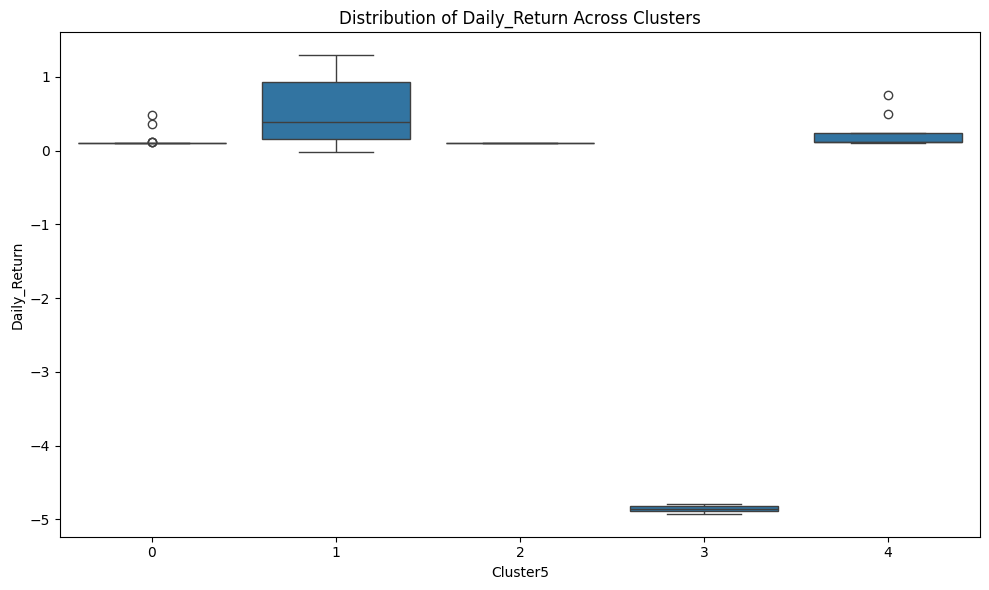

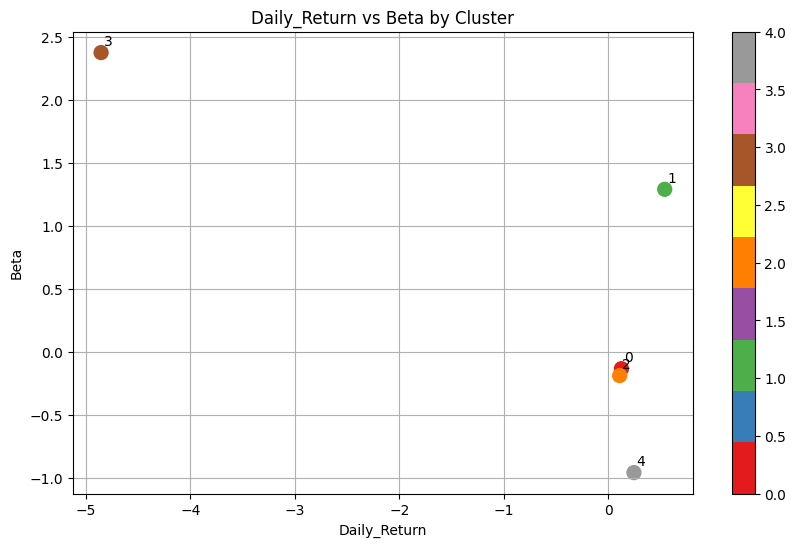

In [183]:
cluster_summary = aggregated_dataset1.groupby('Cluster5')[numeric_cols].mean()
plot_feature_boxplot(aggregated_dataset1, 'Daily_Return', 'Cluster5')
plot_cluster_scatter(cluster_summary, 'Daily_Return', 'Beta')

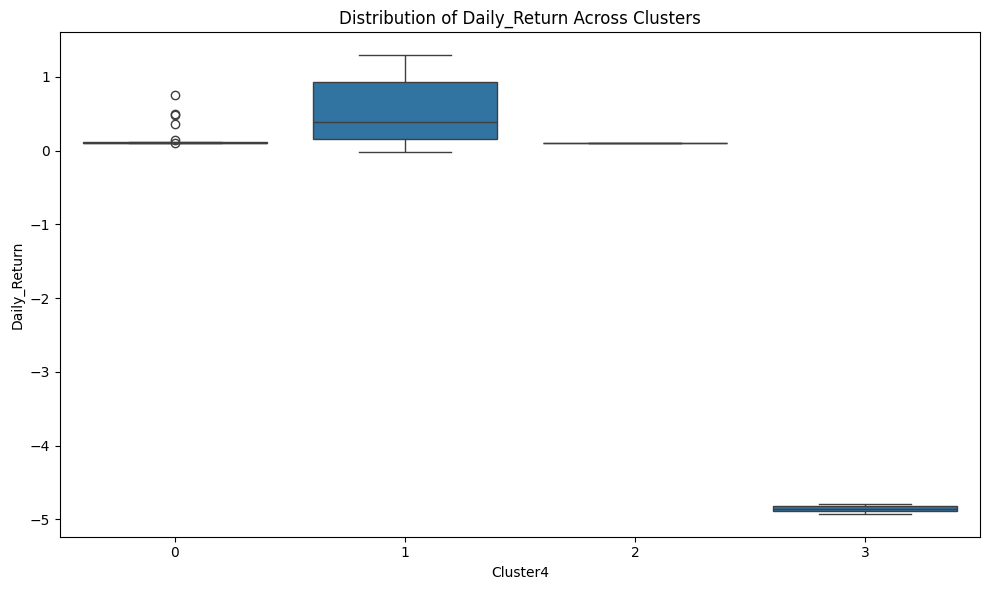

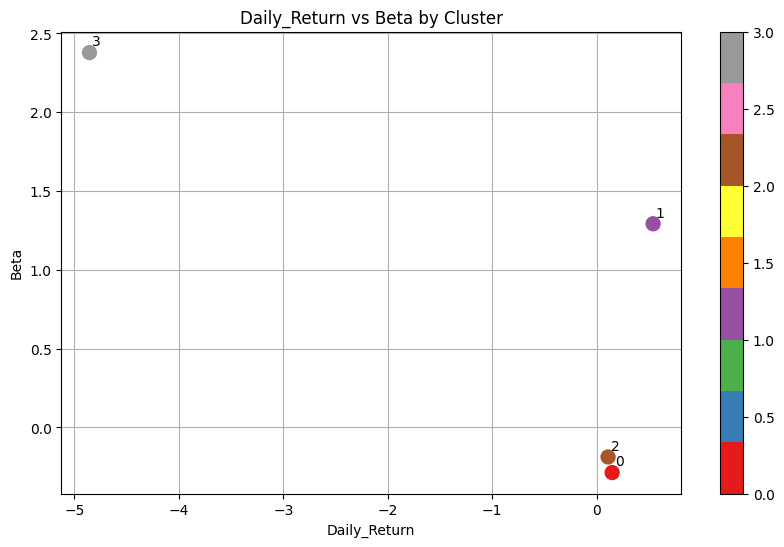

In [184]:
cluster_summary = aggregated_dataset1.groupby('Cluster4')[numeric_cols].mean()
plot_feature_boxplot(aggregated_dataset1, 'Daily_Return', 'Cluster4')
plot_cluster_scatter(cluster_summary, 'Daily_Return', 'Beta')

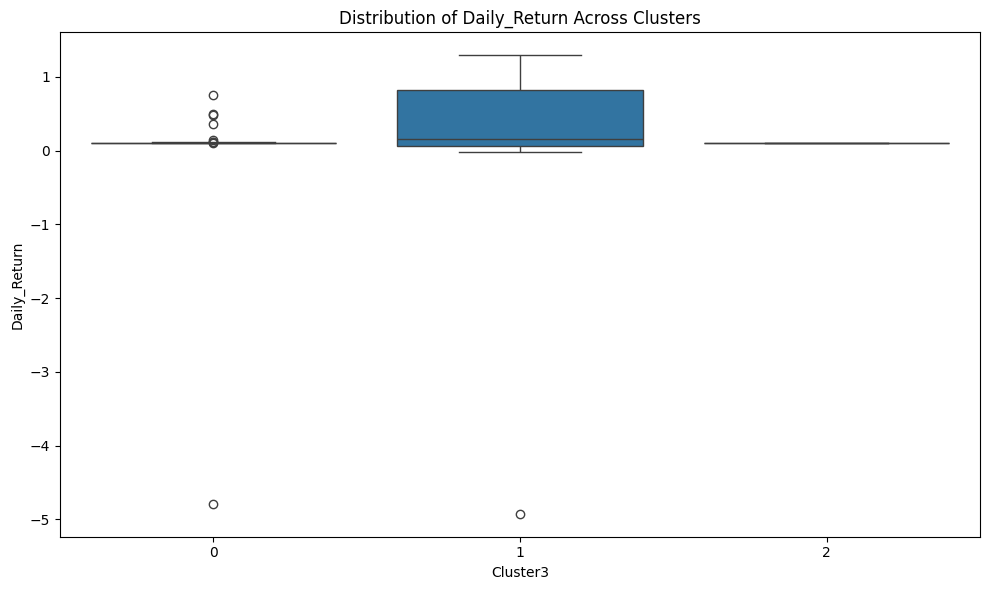

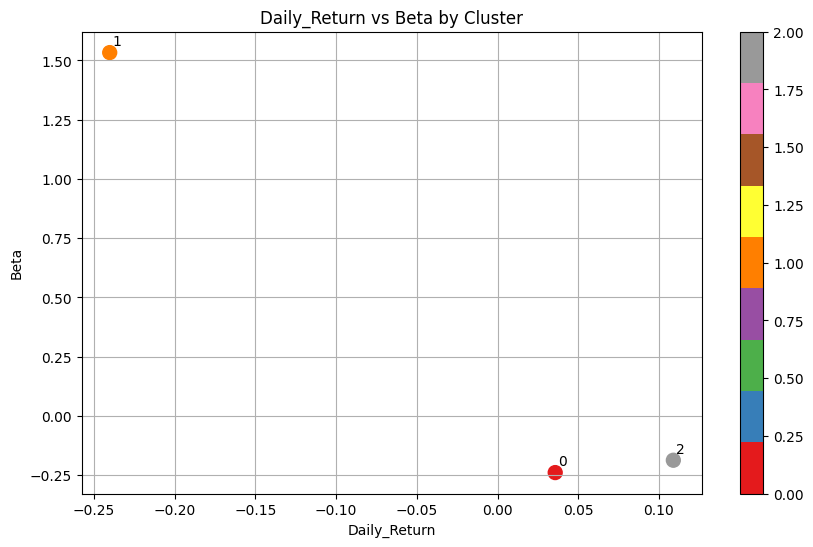

In [185]:
cluster_summary = aggregated_dataset1.groupby('Cluster3')[numeric_cols].mean()
plot_feature_boxplot(aggregated_dataset1, 'Daily_Return', 'Cluster3')
plot_cluster_scatter(cluster_summary, 'Daily_Return', 'Beta')

In [186]:
# Selecting the risk with min risk and max return
def minimize_risk(aggregated_data, kmeans, n_min_stocks=10):
    # if determine_criteria(kmeans) == 'risk':
    #     print("Proceeding with risk minimization strategy...")
    # else:
    #     print("Risk minimization not ideal, but proceeding as requested.")

    sorted_points = aggregated_data.sort_values(by='Beta', ascending=True).index  # Sort by Beta (low to high)
    representative_stocks = aggregated_data.iloc[sorted_points[:n_min_stocks]]['Ticker'].values
    return representative_stocks

def maximize_returns(aggregated_data, kmeans, n_min_stocks=10):
    # if determine_criteria(kmeans) == 'return':
    #     print("Proceeding with return maximization strategy...")
    # else:
    #     print("Return maximization not ideal, but proceeding as requested.")

    sorted_points = aggregated_data.sort_values(by='Daily_Return', ascending=False).index  # Sort by Daily Return (high to low)
    representative_stocks = aggregated_data.iloc[sorted_points[:n_min_stocks]]['Ticker'].values
    return representative_stocks

In [187]:
min_risk_10stock = minimize_risk(aggregated_dataset1, kmeans)

In [188]:
max_return_10stock = maximize_returns(aggregated_dataset1, kmeans)

In [189]:
print("stocks with minimum risks: ",min_risk_10stock)
print("stocks with maximum returns: ",max_return_10stock)

stocks with minimum risks:  ['QQQ' 'IVV' 'VOO' 'SPY' 'ARKK' 'ES3.SI' 'VTI' 'CEDU.SI' 'S68.SI'
 'CJLU.SI']
stocks with maximum returns:  ['AMD' 'GOOGL' 'BABA' 'AAPL' 'J36.SI' 'LVMUY' 'ARKK' 'AMZN' 'MSFT' 'QQQ']


# Building the cluster based on Low risk and Max return

In [190]:
# Selecting the tickers with min risk and max return
def minimize_risk(aggregated_data, kmeans, n_min_stocks=10):
    # if determine_criteria(kmeans) == 'risk':
    #     print("Proceeding with risk minimization strategy...")
    # else:
    #     print("Risk minimization not ideal, but proceeding as requested.")

    sorted_points = aggregated_data.sort_values(by='Beta', ascending=True).index  # Sort by Beta (low to high)
    representative_stocks = aggregated_data.iloc[sorted_points[:n_min_stocks]]['Ticker'].values
    return representative_stocks

def maximize_returns(aggregated_data, kmeans, n_min_stocks=10):
    # if determine_criteria(kmeans) == 'return':
    #     print("Proceeding with return maximization strategy...")
    # else:
    #     print("Return maximization not ideal, but proceeding as requested.")

    sorted_points = aggregated_data.sort_values(by='Daily_Return', ascending=False).index  # Sort by Daily Return (high to low)
    representative_stocks = aggregated_data.iloc[sorted_points[:n_min_stocks]]['Ticker'].values
    return representative_stocks

In [191]:
min_risk_10stock = minimize_risk(aggregated_dataset1, kmeans)

In [192]:
max_return_10stock = maximize_returns(aggregated_dataset1, kmeans)

In [193]:
print("stocks with minimum risks: ",min_risk_10stock)
print("stocks with maximum returns: ",max_return_10stock)

stocks with minimum risks:  ['QQQ' 'IVV' 'VOO' 'SPY' 'ARKK' 'ES3.SI' 'VTI' 'CEDU.SI' 'S68.SI'
 'CJLU.SI']
stocks with maximum returns:  ['AMD' 'GOOGL' 'BABA' 'AAPL' 'J36.SI' 'LVMUY' 'ARKK' 'AMZN' 'MSFT' 'QQQ']


# Building portfolio

In [194]:
min_risk_10stock_df = aggregated_dataset1[aggregated_dataset1['Ticker'].isin(min_risk_10stock)]
max_return_10stock_df = aggregated_dataset1[aggregated_dataset1['Ticker'].isin(max_return_10stock)]

min_risk_10stock_df.reset_index(inplace=True)
max_return_10stock_df.reset_index(inplace=True)

### Equal Weight Portfolio


In [195]:
def equal_weight_portfolio(n):
    return np.array([1.0 / n] * n)

n_stocks = 10
ew_weights = equal_weight_portfolio(n_stocks)
print("EW Weights:", ew_weights)

EW Weights: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


### Market Cap Weighted Portfolio


In [196]:
def market_cap_weighted_portfolio(stock_data):
    market_caps = stock_data['Market Cap']
    return market_caps / market_caps.sum()

mcw_weights_min_risk = market_cap_weighted_portfolio(min_risk_10stock_df)
mcw_weights_max_return = market_cap_weighted_portfolio(max_return_10stock_df)

print("MCW Weights Min:", mcw_weights_min_risk)
print("MCW Weights Max:", mcw_weights_max_return)

MCW Weights Min: 0    0.100533
1    0.100523
2    0.099347
3    0.100533
4    0.100533
5    0.100533
6    0.096396
7    0.100533
8    0.100533
9    0.100533
Name: Market Cap, dtype: float64
MCW Weights Max: 0    0.370149
1   -0.005136
2    0.193611
3   -0.035641
4   -0.003655
5    0.207798
6   -0.034433
7    0.009648
8    0.333300
9   -0.035641
Name: Market Cap, dtype: float64


### Global Minimum Variance Portfolio


In [197]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/preprocessed_data 1.csv')

# Ensure the date column is in datetime format
data['Date_x'] = pd.to_datetime(data['Date_x'])

# Create the pivot table for daily returns with Date_x as rows and Ticker as columns
pivot_table_daily_returns = data.pivot_table(values='Daily_Return', index='Date_x', columns='Ticker')

# Display the pivot table
print(pivot_table_daily_returns.head())

Ticker      9CI.SI   A17U.SI      AAPL   AJBU.SI       AMD      AMZN  \
Date_x                                                                 
2020-01-02     NaN -0.000131  0.116075  0.000028 -0.121182  0.040019   
2020-01-03     NaN  0.000030  0.006738 -0.000605 -0.032640  0.018331   
2020-01-06     NaN -0.000291  0.183013 -0.000447 -0.021041  0.076954   
2020-01-07     NaN -0.000291 -0.038455 -0.000289  0.069427  0.003555   
2020-01-08     NaN -0.000932  0.166429 -0.000289  0.001523 -0.010637   

Ticker          ARKK   AW9U.SI      BABA    BN4.SI  ...        SE       SPY  \
Date_x                                              ...                       
2020-01-02  0.010024  0.000025  0.020787 -0.000176  ...  0.039760  0.005011   
2020-01-03 -0.024643  0.000025  0.004141  0.000137  ... -0.040396  0.004746   
2020-01-06 -0.062980  0.000025  0.011535 -0.000280  ... -0.016028  0.012204   
2020-01-07 -0.032338  0.000025 -0.000226 -0.000384  ... -0.020337 -0.001263   
2020-01-08 -0.082724 

In [198]:
# Select daily returns
pivot_table_daily_returns_min = pivot_table_daily_returns.loc[:, min_risk_10stock]
pivot_table_daily_returns_max = pivot_table_daily_returns.loc[:, max_return_10stock]

# Covariance matrix and mean returns for portfolios
mean_returns_min = pivot_table_daily_returns_min.mean()
cov_matrix_min = pivot_table_daily_returns_min.cov()
mean_returns_max = pivot_table_daily_returns_max.mean()
cov_matrix_max = pivot_table_daily_returns_max.cov()


In [199]:
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def min_variance_portfolio(mean_returns, cov_matrix):
    n = len(mean_returns)
    initial_weights = [1. / n] * n
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n))
    result = minimize(portfolio_volatility, initial_weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    return result['x']

gmv_weights_min = min_variance_portfolio(mean_returns_min.values, cov_matrix_min.values)
gmv_weights_max = min_variance_portfolio(mean_returns_max.values, cov_matrix_max.values)

print("GMV Weights Min:", gmv_weights_min)
print("GMV Weights Max:", gmv_weights_max)

GMV Weights Min: [1.19313481e-17 0.00000000e+00 0.00000000e+00 4.82072194e-04
 1.76182853e-19 3.11148505e-01 1.26511633e-17 3.46559550e-01
 4.23547611e-17 3.41809873e-01]
GMV Weights Max: [3.63426121e-18 0.00000000e+00 1.15452376e-17 1.34233505e-03
 3.43705486e-04 0.00000000e+00 1.45097370e-03 0.00000000e+00
 0.00000000e+00 9.96862986e-01]


### Maximum Sharpe Ratio Portfolio


In [200]:
def portfolio_return(weights, mean_returns):
    return np.sum(weights * mean_returns)

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_ret = portfolio_return(weights, mean_returns)
    p_vol = portfolio_volatility(weights, cov_matrix)
    sharpe_ratio = (p_ret - risk_free_rate) / p_vol
    return -sharpe_ratio

def max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate=0.01):
    n = len(mean_returns)
    initial_weights = np.array([1.0 / n] * n)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for _ in range(n))
    result = minimize(negative_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)
    return result['x']

msr_weights_min = max_sharpe_portfolio(mean_returns_min, cov_matrix_min)
msr_weights_max = max_sharpe_portfolio(mean_returns_max, cov_matrix_max)

print("MSR Weights Min:", msr_weights_min)
print("MSR Weights Max:", msr_weights_max)

MSR Weights Min: [1.66533454e-16 0.00000000e+00 8.32667268e-17 5.55111512e-17
 1.00000000e+00 0.00000000e+00 0.00000000e+00 2.77555756e-17
 0.00000000e+00 0.00000000e+00]
MSR Weights Max: [3.36354654e-01 6.63645346e-01 2.51920450e-16 1.47209916e-16
 0.00000000e+00 0.00000000e+00 5.74750292e-17 0.00000000e+00
 0.00000000e+00 8.23993651e-18]


### Portfolio Performance Calculation


In [201]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    ret = np.sum(weights * mean_returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return ret, vol

In [202]:
# Portfolio performances
ew_ret_min, ew_vol_min = portfolio_performance(ew_weights, mean_returns_min, cov_matrix_min)
ew_ret_max, ew_vol_max = portfolio_performance(ew_weights, mean_returns_max, cov_matrix_max)
mcw_ret_min, mcw_vol_min = portfolio_performance(mcw_weights_min_risk, mean_returns_min, cov_matrix_min)
mcw_ret_max, mcw_vol_max = portfolio_performance(mcw_weights_max_return, mean_returns_max, cov_matrix_max)
gmv_ret_min, gmv_vol_min = portfolio_performance(gmv_weights_min, mean_returns_min, cov_matrix_min)
gmv_ret_max, gmv_vol_max = portfolio_performance(gmv_weights_max, mean_returns_max, cov_matrix_max)
msr_ret_min, msr_vol_min = portfolio_performance(msr_weights_min, mean_returns_min, cov_matrix_min)
msr_ret_max, msr_vol_max = portfolio_performance(msr_weights_max, mean_returns_max, cov_matrix_max)

In [203]:
# Visualization
portfolios = ['EW', 'MCW', 'GMV', 'MSR']
low_risk_returns = [ew_ret_min, mcw_ret_min, gmv_ret_min, msr_ret_min]
low_risk_volatility = [ew_vol_min, mcw_vol_min, gmv_vol_min, msr_vol_min]
max_return_returns = [ew_ret_max, mcw_ret_max, gmv_ret_max, msr_ret_max]
max_return_volatility = [ew_vol_max, mcw_vol_max, gmv_vol_max, msr_vol_max]

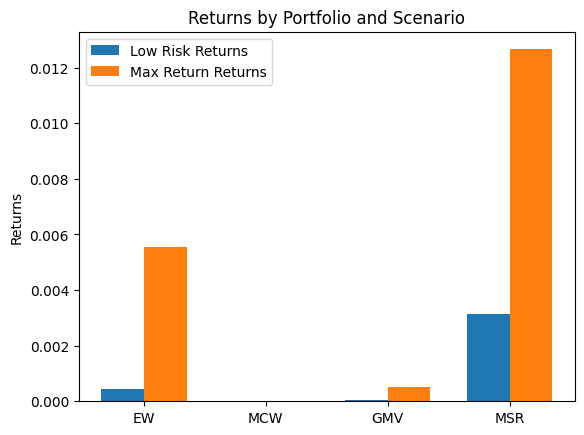

In [204]:
# Bar chart visualization
x = np.arange(len(portfolios))
width = 0.35
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, low_risk_returns, width, label='Low Risk Returns')
bars2 = ax.bar(x + width/2, max_return_returns, width, label='Max Return Returns')
ax.set_ylabel('Returns')
ax.set_title('Returns by Portfolio and Scenario')
ax.set_xticks(x)
ax.set_xticklabels(portfolios)
ax.legend()
plt.show()

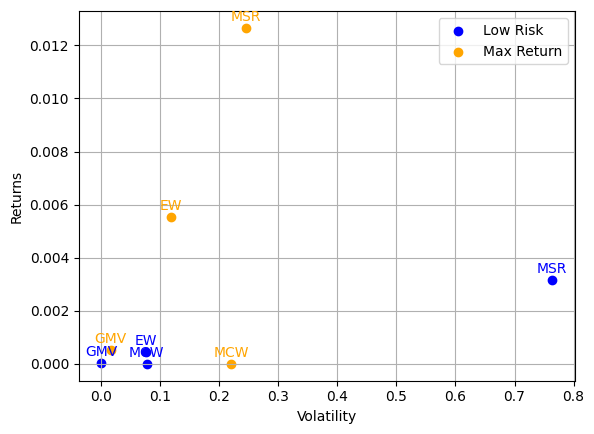

In [205]:
# Scatter plot visualization
plt.figure()
plt.scatter(low_risk_volatility, low_risk_returns, label='Low Risk', color='blue')
plt.scatter(max_return_volatility, max_return_returns, label='Max Return', color='orange')
for i, portfolio in enumerate(portfolios):
    plt.annotate(portfolio, (low_risk_volatility[i], low_risk_returns[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
    plt.annotate(portfolio, (max_return_volatility[i], max_return_returns[i]), textcoords="offset points", xytext=(0,5), ha='center', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Simulated Annealing

In [206]:
import numpy as np

# Define Simulated Annealing Parameters
initial_temp = 10000  # Starting temperature
cooling_rate = 0.003  # Cooling rate
num_iterations = 1000  # Number of iterations

**Justification for Utilizing Simulated Annealing in GMV and MSR Portfolios**

Both equal weighted and market capitalization portfolios are fundamentally straightforward and arithmetic in nature, and therefore, optimizing these portfolios' performance by applying Simulated Annealing does not make sense. The application of Simulated Annealing to the GMV (Global Minimum Variance) and MSR (Maximum Sharpe Ratio) portfolios however could be useful as both of them look for an optimized value.

In [207]:
# Define Simulated Annealing function for GMV portfolio
def simulated_annealing_gmv(mean_returns, cov_matrix):
    n = len(mean_returns)
    weights = np.array([1.0 / n] * n)  # Start with equal weights
    best_weights = weights.copy()
    best_volatility = portfolio_volatility(weights, cov_matrix)
    temperature = initial_temp

    for i in range(num_iterations):
        # Generate new weights (neighbor solution)
        new_weights = weights + np.random.normal(0, 0.1, n)
        new_weights = np.abs(new_weights)  # Keep positive weights
        new_weights /= new_weights.sum()   # Ensure weights sum to 1

        # Calculate volatility of the new weights
        new_volatility = portfolio_volatility(new_weights, cov_matrix)

        # Accept new solution with a probability that decreases with temperature
        if (new_volatility < best_volatility) or (np.exp((best_volatility - new_volatility) / temperature) > np.random.rand()):
            weights = new_weights
            if new_volatility < best_volatility:
                best_weights = new_weights
                best_volatility = new_volatility

        # Cool down the temperature
        temperature *= (1 - cooling_rate)

    return best_weights

In [208]:
# Define Simulated Annealing function for MSR portfolio
def simulated_annealing_msr(mean_returns, cov_matrix, risk_free_rate=0.01):
    n = len(mean_returns)
    weights = np.array([1.0 / n] * n)  # Start with equal weights
    best_weights = weights.copy()
    best_sharpe_ratio = -negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate)
    temperature = initial_temp

    for i in range(num_iterations):
        # Generate new weights (neighbor solution)
        new_weights = weights + np.random.normal(0, 0.1, n)
        new_weights = np.abs(new_weights)  # Keep positive weights
        new_weights /= new_weights.sum()   # Ensure weights sum to 1

        # Calculate Sharpe ratio of the new weights
        new_sharpe_ratio = -negative_sharpe_ratio(new_weights, mean_returns, cov_matrix, risk_free_rate)

        # Accept new solution with a probability that decreases with temperature
        if (new_sharpe_ratio > best_sharpe_ratio) or (np.exp((new_sharpe_ratio - best_sharpe_ratio) / temperature) > np.random.rand()):
            weights = new_weights
            if new_sharpe_ratio > best_sharpe_ratio:
                best_weights = new_weights
                best_sharpe_ratio = new_sharpe_ratio

        # Cool down the temperature
        temperature *= (1 - cooling_rate)

    return best_weights

In [209]:
# Run Simulated Annealing for GMV and MSR
sa_gmv_weights_min = simulated_annealing_gmv(mean_returns_min, cov_matrix_min)
sa_msr_weights_min = simulated_annealing_msr(mean_returns_min, cov_matrix_min)

sa_gmv_weights_max = simulated_annealing_gmv(mean_returns_max, cov_matrix_max)
sa_msr_weights_max = simulated_annealing_msr(mean_returns_max, cov_matrix_max)

In [210]:
# Portfolio Performance Calculation for SA-optimized portfolios
sa_gmv_ret_min, sa_gmv_vol_min = portfolio_performance(sa_gmv_weights_min, mean_returns_min, cov_matrix_min)
sa_msr_ret_min, sa_msr_vol_min = portfolio_performance(sa_msr_weights_min, mean_returns_min, cov_matrix_min)

sa_gmv_ret_max, sa_gmv_vol_max = portfolio_performance(sa_gmv_weights_max, mean_returns_max, cov_matrix_max)
sa_msr_ret_max, sa_msr_vol_max = portfolio_performance(sa_msr_weights_max, mean_returns_max, cov_matrix_max)

# Compare SA-optimized portfolios with the original GMV and MSR portfolios

print("LOW RISK (Min-Risk Portfolio)")
print(f"Original GMV Portfolio - Return: {gmv_ret_min}, Volatility: {gmv_vol_min}")
print(f"SA-Optimized GMV Portfolio - Return: {sa_gmv_ret_min}, Volatility: {sa_gmv_vol_min}\n")

print("MAX RETURN (Max-Return Portfolio)")
print(f"Original MSR Portfolio - Return: {msr_ret_max}, Volatility: {msr_vol_max}")
print(f"SA-Optimized MSR Portfolio - Return: {sa_msr_ret_max}, Volatility: {sa_msr_vol_max}")

LOW RISK (Min-Risk Portfolio)
Original GMV Portfolio - Return: 3.3910242487843016e-05, Volatility: 0.00012929538117923813
SA-Optimized GMV Portfolio - Return: 0.0001064032743766886, Volatility: 0.004389949282792083

MAX RETURN (Max-Return Portfolio)
Original MSR Portfolio - Return: 0.012655888892298359, Volatility: 0.2448042046906063
SA-Optimized MSR Portfolio - Return: 0.010102299363486403, Volatility: 0.2649169107747482


# LSTM

## min risk portfolio

In [217]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Using min risk portfolio for LSTM
weights_data_min = min_risk_10stock_df[['Daily_Return', 'Beta']].values  # Adjust features as needed
weights_data_max = max_return_10stock_df[['Daily_Return', 'Beta']].values  # Adjust features as needed

# Scale the weights
scaler_min = MinMaxScaler(feature_range=(0, 1))
scaler_max = MinMaxScaler(feature_range=(0, 1))

scaled_weights_min = scaler_min.fit_transform(weights_data_min)
scaled_weights_max = scaler_max.fit_transform(weights_data_max)

# Prepare data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        Y.append(data[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 5  # Adjust based on requirements

# Preparing data for min risk
X_min, y_min = create_dataset(scaled_weights_min, time_step)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_min, y_min, test_size=0.2, random_state=42)

# Reshape for LSTM input
X_train_min = X_train_min.reshape(X_train_min.shape[0], X_train_min.shape[1], X_train_min.shape[2])
X_test_min = X_test_min.reshape(X_test_min.shape[0], X_test_min.shape[1], X_test_min.shape[2])

# LSTM model for min risk
model_min = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_min.shape[1], X_train_min.shape[2])),
    LSTM(50),
    Dense(X_train_min.shape[2])  # Match output to feature count
])

model_min.compile(optimizer='adam', loss='mean_squared_error')
model_min.fit(X_train_min, y_train_min, epochs=10, batch_size=32, verbose=1)

# Predictions and inverse scaling
predicted_weights_min = model_min.predict(X_test_min)
predicted_weights_min = scaler_min.inverse_transform(predicted_weights_min)

# Calculate metrics
mae_min = mean_absolute_error(y_test_min, predicted_weights_min)
mse_min = mean_squared_error(y_test_min, predicted_weights_min)

# Output the predicted weights
print("Predicted Weights:", predicted_weights_min)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0049
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0034
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0023
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0015
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0011
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.3425e-04
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 9.8878e-04
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0011
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0013
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0013


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Predicted Weights: [[ 0.13494405 -1.4103943 ]]


## max return portfolio

In [216]:
# Repeat for max return
X_max, y_max = create_dataset(scaled_weights_max, time_step)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_max, y_max, test_size=0.2, random_state=42)

X_train_max = X_train_max.reshape(X_train_max.shape[0], X_train_max.shape[1], X_train_max.shape[2])
X_test_max = X_test_max.reshape(X_test_max.shape[0], X_test_max.shape[1], X_test_max.shape[2])

# LSTM model for max return
model_max = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_max.shape[1], X_train_max.shape[2])),
    LSTM(50),
    Dense(X_train_max.shape[2])
])

model_max.compile(optimizer='adam', loss='mean_squared_error')
model_max.fit(X_train_max, y_train_max, epochs=10, batch_size=32, verbose=1)

# Predictions and inverse scaling
predicted_weights_max = model_max.predict(X_test_max)
predicted_weights_max = scaler_max.inverse_transform(predicted_weights_max)

# Calculate metrics
mae_max = mean_absolute_error(y_test_max, predicted_weights_max)
mse_max = mean_squared_error(y_test_max, predicted_weights_max)


# Output the predicted weights
print("Predicted Weights:", predicted_weights_max)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2837
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2661
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2494
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2335
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2180
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2030
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1881
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1734
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1587
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1441
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Predicted Weights: [[ 0.28886914 -0.4557134 ]]


## Evaluation

In [214]:
print(f"Mean Absolute Error (Min Risk): {mae_min:.4f}")
print(f"Mean Squared Error (Min Risk): {mse_min:.4f}")

print(f"Mean Absolute Error (Max Return): {mae_max:.4f}")
print(f"Mean Squared Error (Max Return): {mse_max:.4f}")

Mean Absolute Error (Min Risk): 1.1421
Mean Squared Error (Min Risk): 2.3188
Mean Absolute Error (Max Return): 0.4936
Mean Squared Error (Max Return): 0.4173
